In [1]:
# !pip install tensorflow==2.17.1 tensorflow_privacy==0.8.11

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.models import Sequential
# from tensorflow_privacy.privacy.optimizers.dp_optimizer_keras import DPKerasSGDOptimizer
# from tensorflow_privacy.privacy.analysis import compute_dp_sgd_privacy
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('train.csv')
pd.set_option('display.max_columns', None)
df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
df.shape

(20758, 18)

In [5]:
df.dtypes

,0
id,int64
Gender,object
Age,float64
Height,float64
Weight,float64
family_history_with_overweight,object
FAVC,object
FCVC,float64
NCP,float64
CAEC,object


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,20758.0,10378.500000,5992.462780,0.00,5189.250000,10378.500000,15567.750000,20757.000000
Age,20758.0,23.841804,5.688072,14.00,20.000000,22.815416,26.000000,61.000000
Height,20758.0,1.700245,0.087312,1.45,1.631856,1.700000,1.762887,1.975663
Weight,20758.0,87.887768,26.379443,39.00,66.000000,84.064875,111.600553,165.057269
FCVC,20758.0,2.445908,0.533218,1.00,2.000000,2.393837,3.000000,3.000000
NCP,20758.0,2.761332,0.705375,1.00,3.000000,3.000000,3.000000,4.000000
CH2O,20758.0,2.029418,0.608467,1.00,1.792022,2.000000,2.549617,3.000000
FAF,20758.0,0.981747,0.838302,0.00,0.008013,1.000000,1.587406,3.000000
TUE,20758.0,0.616756,0.602113,0.00,0.000000,0.573887,1.000000,2.000000


In [7]:
df.isna().sum()

,0
id,0
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
FAVC,0
FCVC,0
NCP,0
CAEC,0


In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df = df.drop('id', axis=1)
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [10]:
df['NObeyesdad'].value_counts()

,count
NObeyesdad,
Obesity_Type_III,4046
Obesity_Type_II,3248
Normal_Weight,3082
Obesity_Type_I,2910
Insufficient_Weight,2523
Overweight_Level_II,2522
Overweight_Level_I,2427


In [11]:
def map_to_4classes(label):
    if label == 'Normal_Weight':
        return 'Healthy'
    elif label in ['Insufficient_Weight', 'Overweight_Level_I', 'Overweight_Level_II']:
        return 'At_Risk'
    elif label in ['Obesity_Type_I', 'Obesity_Type_II']:
        return 'Diagnosed'
    else:
        return 'Under_Observation'

df['Health_Category'] = df['NObeyesdad'].apply(map_to_4classes)

In [12]:
df = df.drop('NObeyesdad', axis=1)

In [13]:
obj_cols = df.select_dtypes(include='object').columns.to_list()
len(obj_cols)

9

In [14]:
obj_cols

['Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS',
 'Health_Category']

In [15]:
for i in obj_cols:
    print("\n",df[i].value_counts())


 Gender
Female    10422
Male      10336
Name: count, dtype: int64

 family_history_with_overweight
yes    17014
no      3744
Name: count, dtype: int64

 FAVC
yes    18982
no      1776
Name: count, dtype: int64

 CAEC
Sometimes     17529
Frequently     2472
Always          478
no              279
Name: count, dtype: int64

 SMOKE
no     20513
yes      245
Name: count, dtype: int64

 SCC
no     20071
yes      687
Name: count, dtype: int64

 CALC
Sometimes     15066
no             5163
Frequently      529
Name: count, dtype: int64

 MTRANS
Public_Transportation    16687
Automobile                3534
Walking                    467
Motorbike                   38
Bike                        32
Name: count, dtype: int64

 Health_Category
At_Risk              7472
Diagnosed            6158
Under_Observation    4046
Healthy              3082
Name: count, dtype: int64


In [16]:
columns = df.columns.to_list()
columns

['Gender',
 'Age',
 'Height',
 'Weight',
 'family_history_with_overweight',
 'FAVC',
 'FCVC',
 'NCP',
 'CAEC',
 'SMOKE',
 'CH2O',
 'SCC',
 'FAF',
 'TUE',
 'CALC',
 'MTRANS',
 'Health_Category']

In [17]:
num_cols = [x for x in columns if x not in obj_cols]
num_cols

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

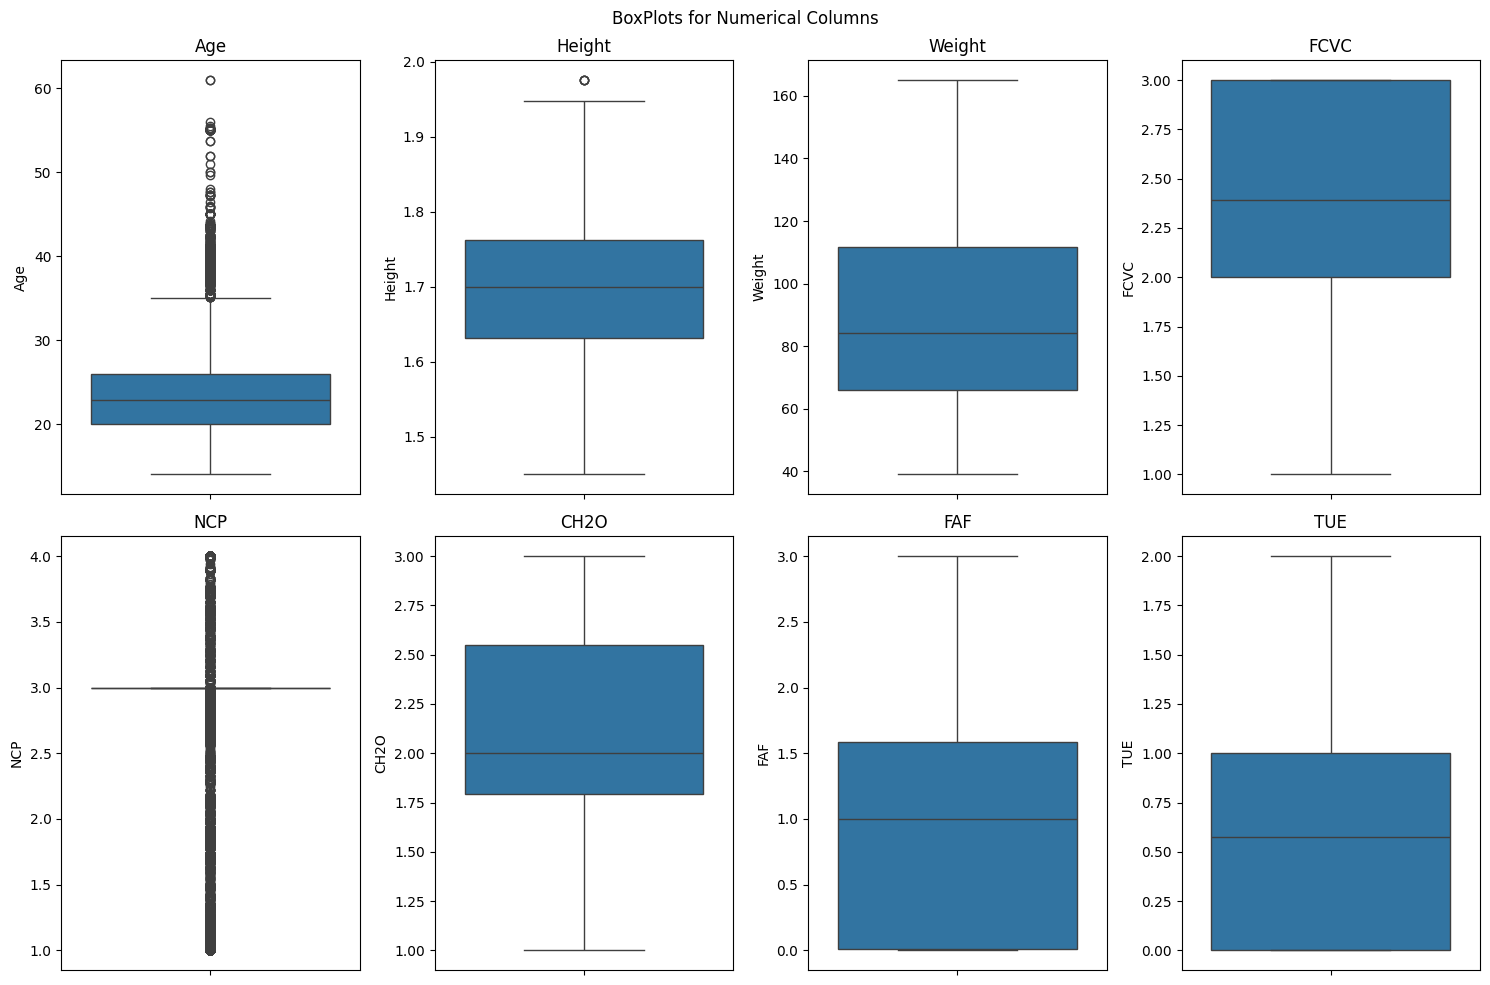

In [18]:
plt.figure(figsize=(15,10))


plt.suptitle("BoxPlots for Numerical Columns")
for i in enumerate(num_cols):
  plt.subplot(2, 4, i[0]+1)
  sns.boxplot(data=df, y=i[1])
  plt.title(i[1])


plt.tight_layout()
plt.show()

In [19]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,20758.0,23.841804,5.688072,14.00,20.000000,22.815416,26.000000,61.000000
Height,20758.0,1.700245,0.087312,1.45,1.631856,1.700000,1.762887,1.975663
Weight,20758.0,87.887768,26.379443,39.00,66.000000,84.064875,111.600553,165.057269
FCVC,20758.0,2.445908,0.533218,1.00,2.000000,2.393837,3.000000,3.000000
NCP,20758.0,2.761332,0.705375,1.00,3.000000,3.000000,3.000000,4.000000
CH2O,20758.0,2.029418,0.608467,1.00,1.792022,2.000000,2.549617,3.000000
FAF,20758.0,0.981747,0.838302,0.00,0.008013,1.000000,1.587406,3.000000
TUE,20758.0,0.616756,0.602113,0.00,0.000000,0.573887,1.000000,2.000000


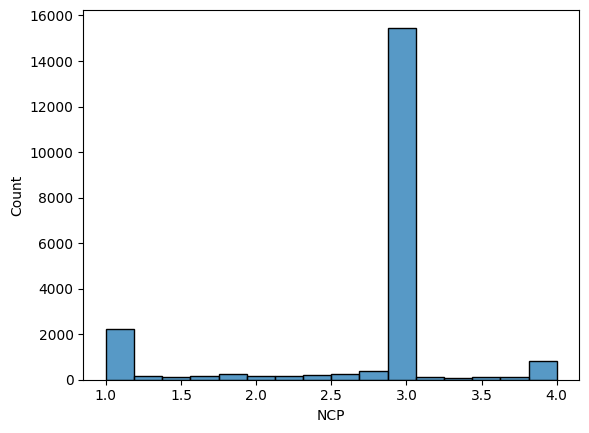

In [20]:
sns.histplot(df['NCP'])
plt.show()

In [21]:
le = LabelEncoder()

def encode(data):
  for col in obj_cols:
    data[col] = le.fit_transform(data[col])

  return data

In [22]:
df = encode(df)
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Health_Category
0,1,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,2,0,2.763573,0,0.000000,0.976473,1,3,0
1,0,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,1,0,2.000000,0,1.000000,1.000000,2,0,2
2,0,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,2,0,1.910378,0,0.866045,1.673584,2,3,0
3,0,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,2,0,1.674061,0,1.467863,0.780199,1,3,3
4,1,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,2,0,1.979848,0,1.967973,0.931721,1,3,0


In [23]:
df.dtypes

,0
Gender,int64
Age,float64
Height,float64
Weight,float64
family_history_with_overweight,int64
FAVC,int64
FCVC,float64
NCP,float64
CAEC,int64
SMOKE,int64


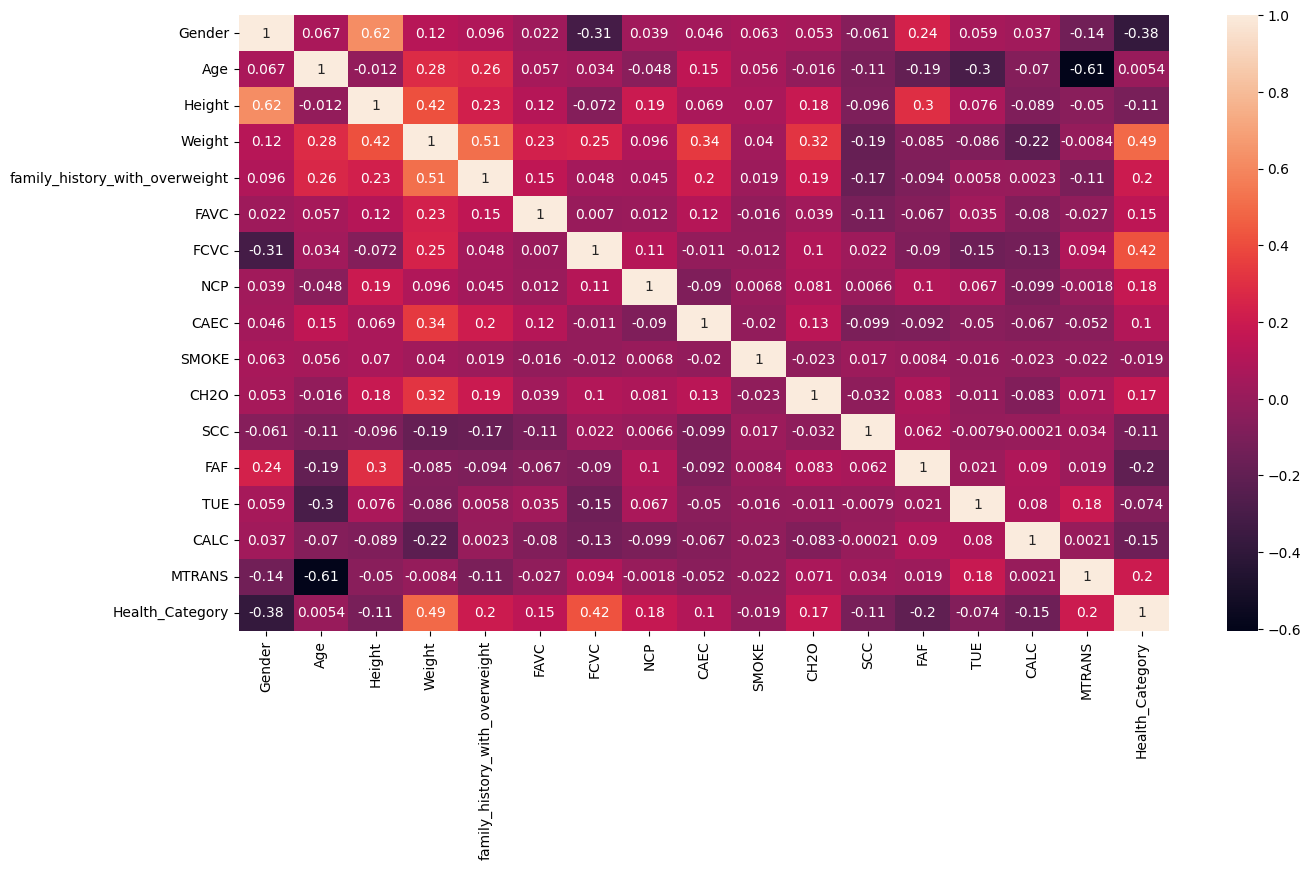

In [24]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [25]:
df.corr()['Health_Category']

,Health_Category
Gender,-0.381441
Age,0.005383
Height,-0.112133
Weight,0.494873
family_history_with_overweight,0.198052
FAVC,0.146398
FCVC,0.418289
NCP,0.177592
CAEC,0.100467
SMOKE,-0.018583


In [26]:
features = ['Gender', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SCC', 'FAF', 'CH2O', 'CALC', 'MTRANS']

X = df[features]
y = df['Health_Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
X_train.shape

(16606, 13)

In [28]:
def make_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(7, activation='softmax')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(0.01),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [29]:
model1 = make_model()
model1.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
y_pred_model1 = np.argmax(model1.predict(X_test, verbose=0), axis=1)
acc_model1 = accuracy_score(y_test, y_pred_model1)
print("Accuracy of Model 1:", acc_model1)

Accuracy of Model 1: 0.8973988439306358


## INPUT PERTUBATION (Noise added to features)

In [30]:
noise_scale = 0.2
X_train_noisy = X_train + np.random.normal(0, noise_scale, X_train.shape)

model2 = make_model()
model2.fit(X_train_noisy, y_train, epochs=10, batch_size=32, verbose=0)
y_pred_model2 = np.argmax(model2.predict(X_test, verbose=0), axis=1)
acc_input = accuracy_score(y_test, y_pred_model2)
print(f"📊 Input Perturbation Accuracy: {acc_input:.3f}")

📊 Input Perturbation Accuracy: 0.878


## OBJECTIVE PERTUBATION (Noise added to gradients)

In [31]:
# 🧮 OBJECTIVE PERTURBATION (noise added to gradients)
model_obj = make_model()
optimizer = tf.keras.optimizers.Adam(0.01)
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()

batch_size = 32
epochs = 10
noise_stddev = 0.1

# ✅ Convert to NumPy arrays to avoid Pandas KeyError
X_train_np = np.array(X_train)
y_train_np = np.array(y_train)

for epoch in range(epochs):
    idx = np.random.permutation(len(X_train_np))
    Xb, yb = X_train_np[idx], y_train_np[idx]

    for i in range(0, len(Xb), batch_size):
        xb = Xb[i:i+batch_size]
        ybatch = yb[i:i+batch_size]

        with tf.GradientTape() as tape:
            preds = model_obj(xb, training=True)
            loss = loss_fn(ybatch, preds)

        grads = tape.gradient(loss, model_obj.trainable_variables)

        # ➕ Add Gaussian noise to each gradient tensor
        noisy_grads = [g + tf.random.normal(shape=g.shape, stddev=noise_stddev)
                       for g in grads]
        optimizer.apply_gradients(zip(noisy_grads, model_obj.trainable_variables))

y_pred_obj = np.argmax(model_obj.predict(X_test, verbose=0), axis=1)
acc_obj = accuracy_score(y_test, y_pred_obj)
print(f"📊 Objective Perturbation → Accuracy: {acc_obj:.3f}")


📊 Objective Perturbation → Accuracy: 0.895


## PREDICTION PERTURBATION (Noise added to the output)

In [32]:
model_pred = make_model()
model_pred.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

preds = model_pred.predict(X_test, verbose=0)
preds_noisy = preds + np.random.normal(0, 0.05, preds.shape)
y_pred_pred = np.argmax(preds_noisy, axis=1)

acc_pred = accuracy_score(y_test, y_pred_pred)
print(f"📊 Prediction Perturbation → Accuracy: {acc_pred:.3f}")

📊 Prediction Perturbation → Accuracy: 0.900


## Summary
### Method and Accuracy
#### Without noise -> 0.89739
#### Input Perturbation -> 0.878
#### Objective Perturbation -> 0.895
#### Prediction Perturbation -> 0.900